<a href="https://colab.research.google.com/github/KorhanErkan/TASK-3B/blob/master/TASK_3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-3B: Please provide an analysis (mean and standard deviation) for the volumes of hippocampus (HIPPOVOL) with respect to the level of Alzheimer's Disease.

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data_all = pd.read_csv("MRI_and_CDRinfo_Values_X_train.csv") 
data_labels = pd.read_csv("CDR_Values_y_train.csv")          

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (41,46,48,97,208,210,213,216,219,225,227,229,235,239,243,365,382,384,634,654,689,908,946,964,965,1176) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_all

In [ ]:
data_labels

In [ ]:
data_all["HIPPOVOL"]

0       5.1960
1       6.8940
2       6.2860
3       5.5890
4       7.4100
         ...  
1297    7.4420
1298    6.8940
1299    4.7619
1300    4.7385
1301       NaN
Name: HIPPOVOL, Length: 1302, dtype: float64

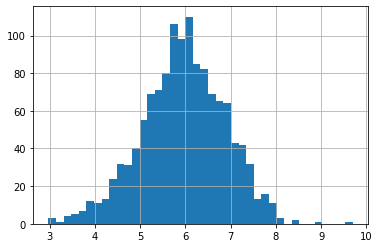

In [ ]:
x = data_all["HIPPOVOL"].hist(bins=40)

In [ ]:
data_labels

,Unnamed: 0,CDRGLOB
0,1970,0
1,1146,0
2,675,0
3,1268,2
4,2323,0
...,...,...
1583,984,1
1584,1325,1
1585,788,2
1586,195,1


In [ ]:
data_labels["HIP_VOL"] = data_all["HIPPOVOL"]

In [ ]:
data_labels

,Unnamed: 0,CDRGLOB,HIP_VOL
0,1970,0,5.1960
1,1146,0,6.8940
2,675,0,6.2860
3,1268,2,5.5890
4,2323,0,7.4100
...,...,...,...
1583,984,1,7.9400
1584,1325,1,5.3273
1585,788,2,6.5270
1586,195,1,5.3400


In [ ]:
C0 = (data_labels[data_labels["CDRGLOB"]==0].iloc[:,2])

In [ ]:
C1 = (data_labels[data_labels["CDRGLOB"]==1].iloc[:,2])

In [ ]:
C2 = (data_labels[data_labels["CDRGLOB"]==2].iloc[:,2])

In [ ]:
C3 = (data_labels[data_labels["CDRGLOB"]==3].iloc[:,2])

In [ ]:
C0M = C0.mean()
C1M = C1.mean()
C2M = C2.mean()
C3M = C3.mean()

In [ ]:
C0STD = C0.std()
C1STD = C1.std()
C2STD = C2.std()
C3STD = C3.std()

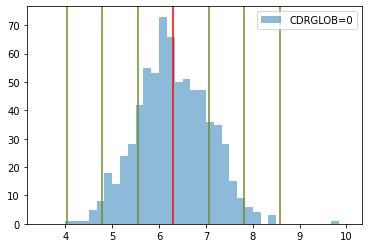

In [ ]:
bins = np.linspace(3.5, 10, 40)
plt.hist(C0, bins, alpha=0.5, label='CDRGLOB=0')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(C0M+v*C0STD, color='olivedrab')
plt.axvline(C0M, color='red')
plt.legend(loc='upper right')
plt.show()

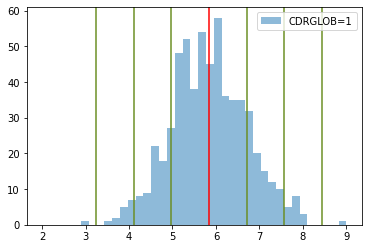

In [ ]:
bins = np.linspace(2, 9, 40)
plt.hist(C1, bins, alpha=0.5, label='CDRGLOB=1')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(C1M+v*C1STD, color='olivedrab')
plt.axvline(C1M, color='red')
plt.legend(loc='upper right')
plt.show()

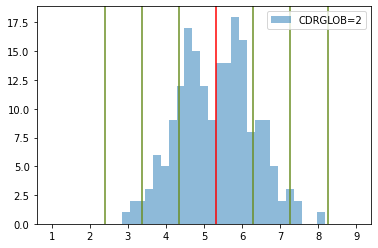

In [ ]:
bins = np.linspace(1, 9, 40)
plt.hist(C2, bins, alpha=0.5, label='CDRGLOB=2')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(C2M+v*C2STD, color='olivedrab')
plt.axvline(C2M, color='red')
plt.legend(loc='upper right')
plt.show()

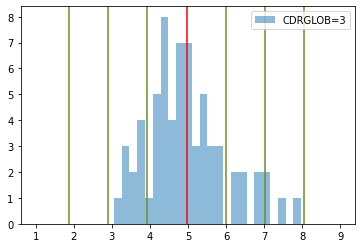

In [ ]:
bins = np.linspace(1, 9, 40)
plt.hist(C3, bins, alpha=0.5, label='CDRGLOB=3')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(C3M+v*C3STD, color='olivedrab')
plt.axvline(C3M, color='red')
plt.legend(loc='upper right')
plt.show()

Örnek olarak HIPPOVOL değeri 7 olan bir kişi için:

In [ ]:
y = data_labels["HIP_VOL"]

In [ ]:
len(np.where(y > 7)[0])

203

In [ ]:
len(y)

1588

In [ ]:
203*100/1588

12.78337531486146

The CDR is based on a scale of 0–3: no dementia (CDR = 0), questionable dementia (CDR = 0.5), MCI (CDR = 1), moderate cognitive impairment (CDR = 2), and severe cognitive impairment (CDR = 3). 

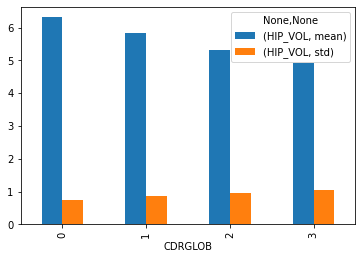

In [ ]:
data_labels.groupby('CDRGLOB').agg({
    'HIP_VOL': ['mean','std']
}).plot(kind='bar')